In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


Importing Libraries

In [4]:
import tensorflow_hub as hub
import cv2
import numpy
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
pip install tensorflow_hub

Note: you may need to restart the kernel to use updated packages.


In [5]:
#Loading the image using Opencv2

width = 1028
height = 1028


img = cv2.imread(r'C:\Users\u\Desktop\python practice\im.jfif')
#Resize to respect the input_shape
inp = cv2.resize(img, (width , height ))


In [6]:
#loading the label detector image.
d = hub.load("https://tfhub.dev/tensorflow/efficientdet/lite2/detection/1")
width = 1028

Preprocessing of the image

In [7]:
#Convert img to RGB
rgb = cv2.cvtColor(inp, cv2.COLOR_BGR2RGB)

#Is optional but i recommend (float convertion and convert img to tensor image)
rgb_tensor = tf.convert_to_tensor(rgb, dtype=tf.uint8)

#Add dims to rgb_tensor
rgb_tensor = tf.expand_dims(rgb_tensor , 0)


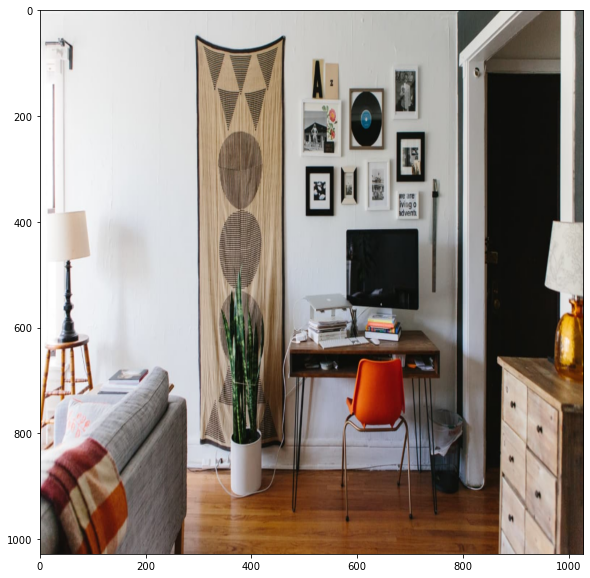

In [8]:
# Visualisation of Image
plt.figure(figsize=(10,10))
plt.imshow(rgb)

In [9]:
boxes, scores, classes, num_detections = d(rgb_tensor)

In [10]:
# Reading the Labels file

l = pd.read_csv(r'C:\Users\u\Desktop\labels.csv',sep=';',index_col='ID')
l = l['OBJECT (2017 REL.)']
l.head()

ID
1        person
2       bicycle
3           car
4    motorcycle
5      airplane
Name: OBJECT (2017 REL.), dtype: object

In [11]:
pred = classes.numpy().astype('int')[0] 
pred = [l[i] for i in pred]
pred_boxes = boxes.numpy()[0].astype('int')
pred_scores = scores.numpy()[0]

In [12]:
for score, (ymin,xmin,ymax,xmax), label in zip(pred_scores, pred_boxes, pred):
        if score < 0.5:
            continue
            
        score_txt = f'{100 * round(score)}%'
        img_boxes = cv2.rectangle(rgb,(xmin, ymax),(xmax, ymin),(0,255,0),2)      
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(img_boxes, label,(xmin, ymax-10), font, 1.5, (255,0,0), 2, cv2.LINE_AA)
        cv2.putText(img_boxes,score_txt,(xmax, ymax-10), font, 1.5, (255,0,0), 2, cv2.LINE_AA)

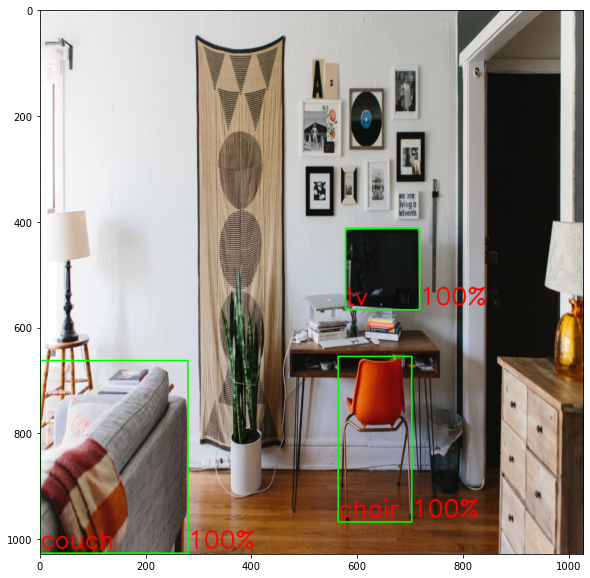

In [13]:
plt.figure(figsize=(10,10))
plt.imshow(img_boxes)

plt.savefig('image_pred.jpg',transparent=True, )